# 台灣觀光如何推廣會比較有效呢?

## 讀入資料

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("106年來臺旅客消費及動向調查_原始資料_1內容.csv")
df.head(5)

,id,mon,stay,freq,plan,ad,ad1,ad2,ad3,ad4,...,i10,i11,i12,i13,i14,i15,i16,i17,i18,i19
0,1060001,1,2,2,60,1,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1060002,1,8,1,180,2,.,.,.,.,...,0,0,0,0,0,0,0,1,0,0
2,1060003,1,7,1,60,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,1060004,1,2,36,30,2,.,.,.,.,...,0,0,0,0,0,0,0,0,0,0
4,1060005,1,12,8,14,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [2]:
#去掉不需要的資料
df=df.drop(['id','mon','stay','freq','plan'],axis=1)
#表格中無資料的紀錄視為程度低或是沒有，將資料改為0
df.replace('.',0,inplace = True)
#將原資料為str的數字改為int
df.replace('0',0,inplace = True)
df.replace('1',1,inplace = True)
df.replace('2',2,inplace = True)
df.replace('3',3,inplace = True)
df.replace('4',4,inplace = True)
df.replace('5',5,inplace = True)

In [3]:
ad=df['ad']

## 1-1.來臺灣前看過的臺灣觀光宣傳廣告或旅遊報導對決定來臺觀光的影響程度(複選)
 ## (1=非常低，2=稍低，3=普通， 4=稍高，5=非常高，0=沒有看過 )

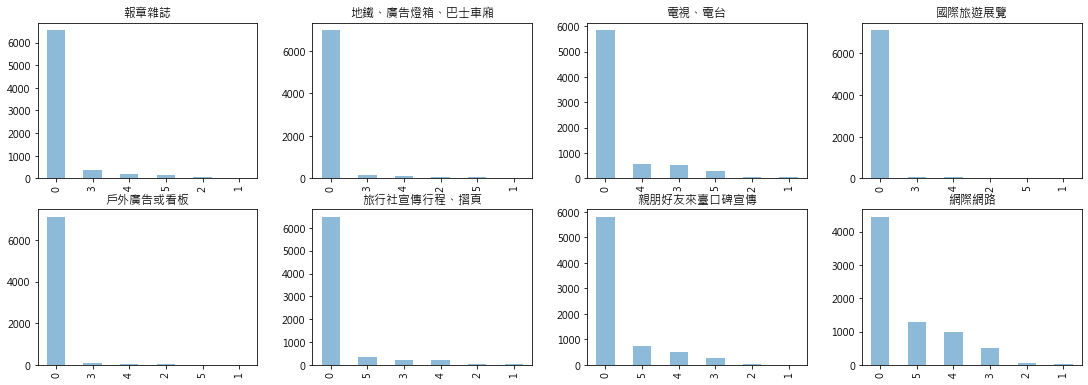

In [206]:
#取出要的資料
ad_type=df.loc[:,'ad1':'ad8']
#加上管道名稱
ad_type.columns=['報章雜誌','地鐵、廣告燈箱、巴士車廂','電視、電台','國際旅遊展覽'
                 ,'戶外廣告或看板','旅行社宣傳行程、摺頁','親朋好友來臺口碑宣傳','網際網路']

#繪製各管道個別的程度
fig, axes = plt.subplots(2,4,figsize=(5,5))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=1, bottom=0.05, left=0.1, right=3)

ad_type_array=[]

for i in range(2):
    for j in range(4):
        ad_type_array.append(ad_type.iloc[:,j+4*i].value_counts().plot.bar(ax=axes[i,j], alpha = 0.5))
        ad_type_array[j+4*i].set_title(ad_type.columns.values[j+4*i])

plt.show()


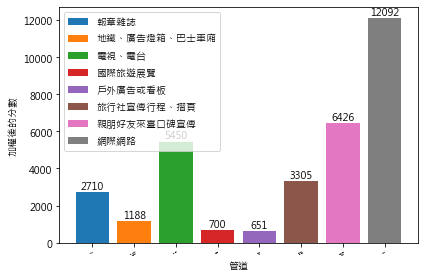

In [207]:
#透過加權(程度0*程度0的人數+程度0*程度0的人數+程度1*程度1的人數+...+程度5*程度5的人數)比較各管道的影響程度
ad_type_weight=[]

#算各管道加權後的總分
for i in range(8):
    a=np.array(ad_type.iloc[:,i].value_counts().index)
    b=np.array(ad_type.iloc[:,i].value_counts())
    ad_type_weight.append(sum(np.multiply(a,b)))

#視覺化
plt.xlabel('管道')
plt.ylabel('加權後的分數')

plt.xticks(range(8),('報章雜誌','地鐵、廣告燈箱\n、巴士車廂','電視、電台','旅遊展覽'
                 ,'戶外廣告\n或看板','旅行社宣傳\n行程、摺頁','親朋好友來臺\n口碑宣傳','網際網路'),size=0, rotation=30)
bar1 = plt.bar(ad_type.columns[0],ad_type_weight[0],label='報章雜誌')
bar2 = plt.bar(ad_type.columns[1],ad_type_weight[1],label='地鐵、廣告燈箱、巴士車廂')
bar3 = plt.bar(ad_type.columns[2],ad_type_weight[2],label='電視、電台')
bar4 = plt.bar(ad_type.columns[3],ad_type_weight[3],label='國際旅遊展覽')
bar5 = plt.bar(ad_type.columns[4],ad_type_weight[4],label='戶外廣告或看板')
bar6 = plt.bar(ad_type.columns[5],ad_type_weight[5],label='旅行社宣傳行程、摺頁')
bar7 = plt.bar(ad_type.columns[6],ad_type_weight[6],label='親朋好友來臺口碑宣傳')
bar8 = plt.bar(ad_type.columns[7],ad_type_weight[7],label='網際網路')

for rect in bar1+bar2+bar3+bar4+bar5+bar6+bar7+bar8:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), size = 10, ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

## 分析
### 最有效的管道為網際網路，其可能原因為網際網路為現在多數人接觸訊息的主要管道，且各類型(文字、圖像)的旅遊資訊(交通、住宿、飲食etc.)皆能透過網路得到解答。其次親友宣傳為第二有影響力，可能是因為親友的經驗讓人覺得有具有較高的可信度。
### 若是要推廣台灣觀光，可以多利用網路的平台宣傳，或是用旅遊補助等拉力讓多一點人來台灣旅遊，並藉由他們的線上或私下的經驗分享、宣傳，使更多人知道台灣有趣、吸引人的景點。

## 1-2.承上題，多是參考哪些網際網路平台?

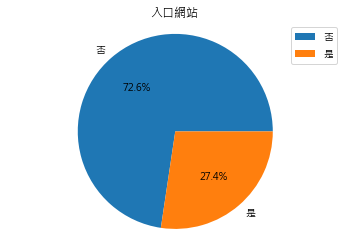

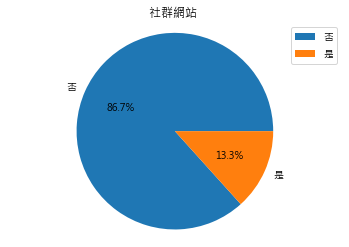

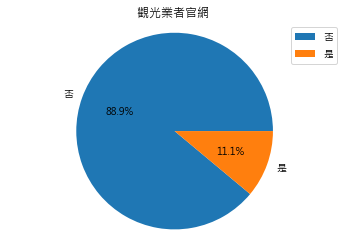

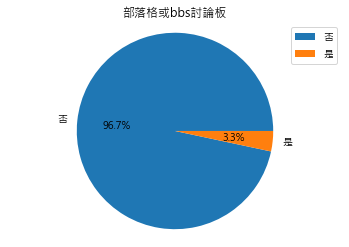

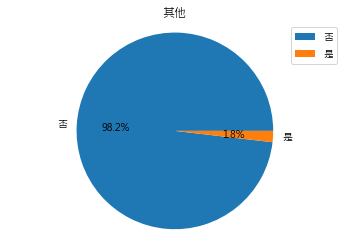

In [208]:
#選取要的資料 
ad_net=df.values[:,9:14]

#將原資料的0與1改成否與是
ad_net[ad_net==0]='否'
ad_net[ad_net==1]='是'

ad_net=pd.DataFrame(ad_net)

#加上管道名稱
ad_net.columns=['入口網站','社群網站 ','觀光業者官網 ','部落格或bbs討論板','其他']

#視覺化
for i in range(5):
    fig = plt.figure()
    plt.pie(ad_net.iloc[:,i].value_counts(),autopct = "%1.1f%%"
                 ,labels=ad_net.iloc[:,i].value_counts().index)
    plt.title(ad_net.columns[i])
    plt.axis('equal')
    plt.legend(loc="best")


## 分析
### 所有的管道"是"的比例都低於30%,其中最高為是27.4%的入口網站(將不同來源的資訊以一種整齊劃一的形式整理、儲存並呈現的網站)。由此可見雖然網路廣告、宣傳比起第一題其他管道來的有效，但並不普及。

## 2.吸引來臺觀光原因

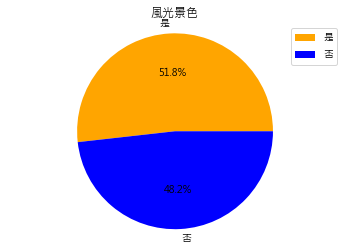

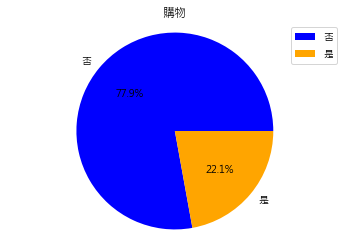

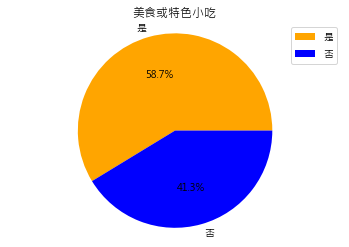

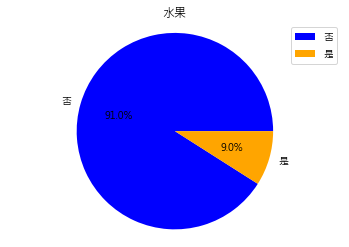

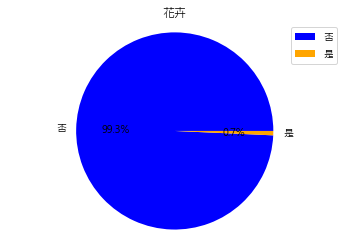

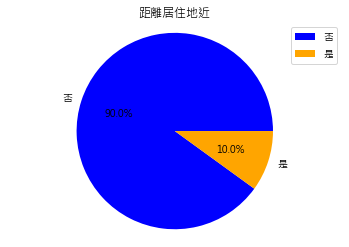

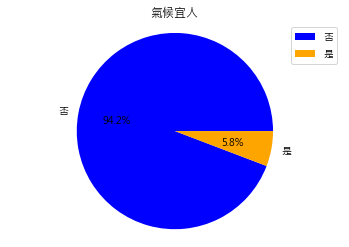

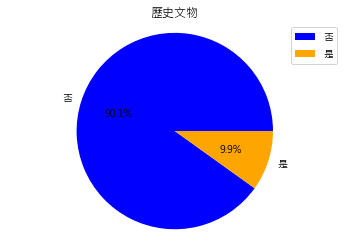

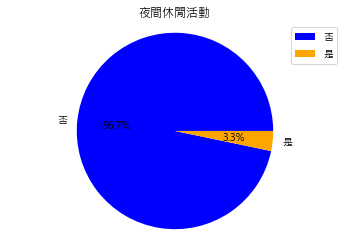

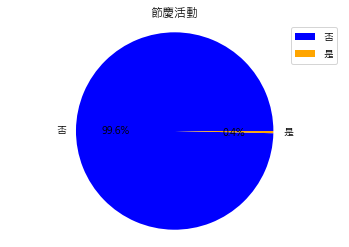

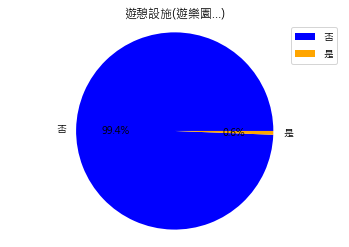

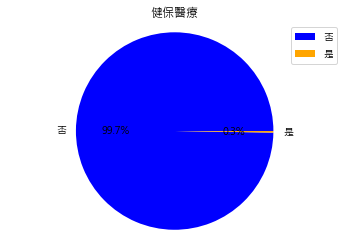

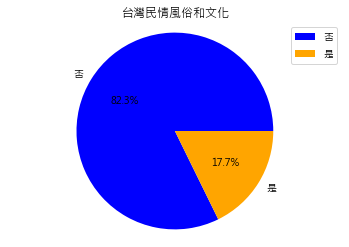

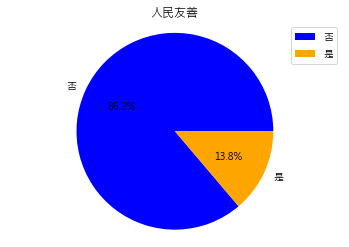

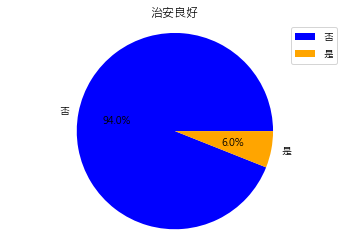

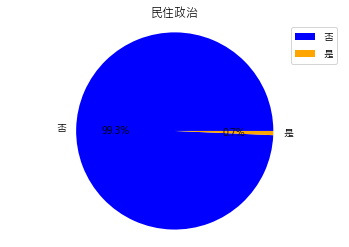

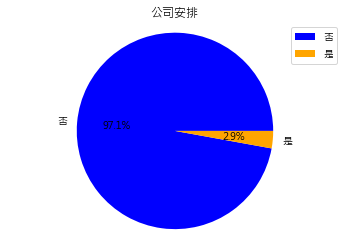

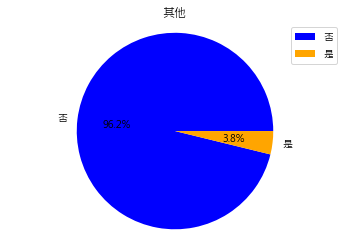

In [205]:
#選取要的資料
att=df.values[:,36:54]

#將資料中的0和1改為否和是
att[att==0]='否'
att[att==1]='是'
att=pd.DataFrame(att)

#加上原因的名稱
att.columns=['風光景色','購物','美食或特色小吃','水果','花卉','距離居住地近','氣候宜人','歷史文物','夜間休閒活動','節慶活動','遊憩設施(遊樂園…)','健保醫療','台灣民情風俗和文化','人民友善','治安良好','民住政治','公司安排','其他']

#視覺化
for i in range(18):
    fig = plt.figure()
    if att.iloc[:,i].value_counts()['否']>att.iloc[:,i].value_counts()['是']:
        plt.pie(att.iloc[:,i].value_counts(),autopct = "%1.1f%%"
                ,labels=att.iloc[:,i].value_counts().index,colors=['blue','orange'])
    else:
        plt.pie(att.iloc[:,i].value_counts(),autopct = "%1.1f%%"
                ,labels=att.iloc[:,i].value_counts().index,colors=['orange','blue'])
    plt.axis('equal')
    plt.legend(loc="upper right")
    plt.title(att.columns[i])

## 分析
### 對外國遊客來說最吸引人的台灣觀光特色是風光景色與美食、特色小吃。在推廣時可以以這兩個題目為核心去發展宣傳廣告、旅遊行程等，另外可將其次吸引人的購物、人民友善、風俗文化融入其中。